<a href="https://colab.research.google.com/github/Nireplag/ML_zoomcamp/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.12


In [2]:
# question 1
!pip install pipenv
!pipenv --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 45.0 MB/s eta 0:00:00
pipenv, version 2023.10.3


In [3]:
!pipenv install scikit-learn==1.3.1

Creating a virtualenv for this project...
Pipfile: /content/Pipfile
Using default python from /usr/bin/python3 (3.10.12) to create virtualenv...
⠸ Creating virtual environment...created virtual environment CPython3.10.12.final.0-64 in 1662ms
  creator CPython3Posix(dest=/root/.local/share/virtualenvs/content-cQIIIOO2, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.2.0, wheel==0.41.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment!
⠼ Creating virtual environment...
Virtualenv location: /root/.local/share/virtualenvs/content-cQIIIOO2
Creating a Pipfile for this project...
Installing scikit-learn==1.3.1...
Resolving scikit-learn==1.3.1...
Added scikit-learn to Pipfile's [packages] ...
✔ Installatio

In [4]:
import json

In [5]:
# question 2
with open('Pipfile.lock', 'r') as file:
  data = json.load(file)

print(data["default"]['scikit-learn']['hashes'][0])

sha256:0c275a06c5190c5ce00af0acbb61c06374087949f643ef32d355ece12c4db043


In [6]:
# import files
!wget 'https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework/model1.bin'
!wget 'https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework/dv.bin'

--2023-10-16 03:20:58--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework/model1.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 842 [application/octet-stream]
Saving to: ‘model1.bin’

model1.bin          100%[===================>]     842  --.-KB/s    in 0s      

2023-10-16 03:20:58 (18.7 MB/s) - ‘model1.bin’ saved [842/842]

--2023-10-16 03:20:58--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework/dv.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [7]:
import pickle

In [9]:
# Question 3

with open('model1.bin', 'rb') as f_in:
    model = pickle.load(f_in)

with open('dv.bin', 'rb') as f_in:
    dv = pickle.load(f_in)

client = {"job": "retired", "duration": 445, "poutcome": "success"}

X = dv.transform([client])
y_pred = model.predict_proba(X)[0, 1]

print(round(y_pred,3))

0.902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.3.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.3.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
from flask import Flask
from flask import request
from flask import jsonify
import requests

In [21]:
app = Flask('client')

with open('model1.bin', 'rb') as f_in:
    model = pickle.load(f_in)

with open('dv.bin', 'rb') as f_in:
    dv = pickle.load(f_in)

@app.route('/predict', methods=['POST'])
def predict():
    client = request.get_json()

    X = dv.transform([client])
    y_pred = model.predict_proba(X)[0, 1]

    result = {
        'client_probability': float(y_pred)
    }

    return jsonify(result)


if __name__ == "__main__":
    app.run(debug=True, host='0.0.0.0', port=9696)

 * Serving Flask app 'client'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:9696
 * Running on http://172.28.0.12:9696
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [23]:
url = "http://127.0.0.1:9696"
client = {"job": "unknown", "duration": 270, "poutcome": "failure"}
requests.post(url, json=client).json()

ConnectionError: ignored

In [24]:
#local run of question 4


with open('model1.bin', 'rb') as f_in:
    model = pickle.load(f_in)

with open('dv.bin', 'rb') as f_in:
    dv = pickle.load(f_in)

client = {"job": "unknown", "duration": 270, "poutcome": "failure"}

X = dv.transform([client])
y_pred = model.predict_proba(X)[0, 1]

print(round(y_pred,3))

0.14


Docker image download
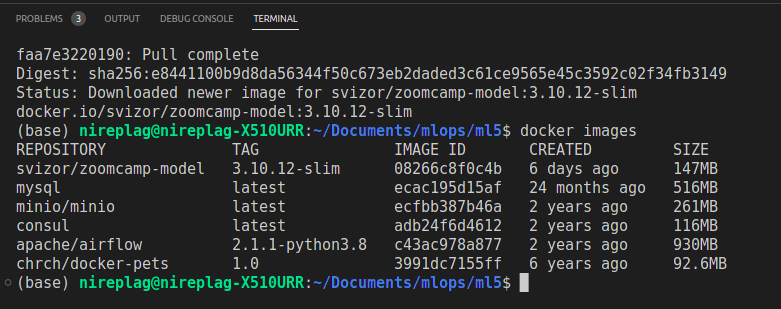

response from docker image
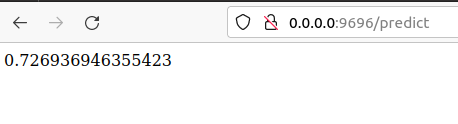